In [122]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras import models
model = models.Sequential()

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [123]:
#loading images and their labels
X = np.load('X.npy') # images
Y = np.load('Y.npy') # labels for the images (0 = no IDC, 1 = IDC)

In [124]:
#making sure the data for X crossed over correctly
print(X[:3])

[[[[226 164 206]
   [224 154 196]
   [225 175 211]
   ...
   [240 221 237]
   [232 184 214]
   [243 213 235]]

  [[217 142 188]
   [221 130 179]
   [224 150 196]
   ...
   [227 170 204]
   [229 180 215]
   [236 212 232]]

  [[237 178 212]
   [229 157 199]
   [218 125 175]
   ...
   [221 184 217]
   [190 153 193]
   [227 164 208]]

  ...

  [[217 145 192]
   [214 129 184]
   [212 129 183]
   ...
   [194 122 185]
   [204 143 193]
   [189 129 188]]

  [[218 144 192]
   [213 128 185]
   [208 121 171]
   ...
   [136  79 145]
   [184 111 174]
   [188 112 176]]

  [[212 125 181]
   [211 136 181]
   [220 162 206]
   ...
   [127  90 152]
   [213 167 202]
   [215 180 211]]]


 [[[219 150 197]
   [217 158 201]
   [228 173 205]
   ...
   [198 165 199]
   [230 204 224]
   [231 193 221]]

  [[223 150 195]
   [222 140 192]
   [213 133 186]
   ...
   [218 143 193]
   [218 148 197]
   [215 131 185]]

  [[203 125 176]
   [218 143 192]
   [227 163 199]
   ...
   [210 137 188]
   [203 121 177]
   [192 124

In [125]:
#making sure the data for Y crosssed over correctly
print(Y[:5])

[0 0 0 0 0]


In [126]:
#total number of images 
print('Total number of images: {}'.format(len(X)))

Total number of images: 5547


In [127]:
#total number of negative IDC images
print('Number of negative IDC Images: {}'.format(np.sum(Y==0)))

Number of negative IDC Images: 2759


In [128]:
#total number of positive IDC images
print('Number of positive IDC Images: {}'.format(np.sum(Y==1)))

Number of positive IDC Images: 2788


In [129]:
#shape of the images
print('Image shape (Width, Height, Channels): {}'.format(X[0].shape))

Image shape (Width, Height, Channels): (50, 50, 3)


In [130]:
#train/test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [131]:
# Reduce Sample Size
x_train = x_train[0:30000] 
y_train = y_train[0:30000]
x_test = x_test[0:30000] 
y_test = y_test[0:30000]

In [132]:
# rescale pizel intensity
x_train = x_train / 256.0
x_test = x_test / 256.0

In [133]:
#verifying shape
print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data Shape: (4437, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3)


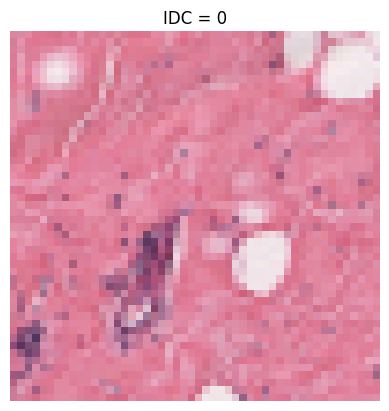

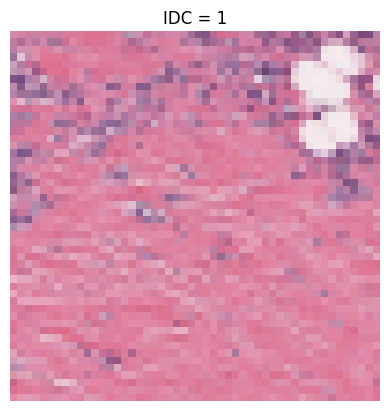

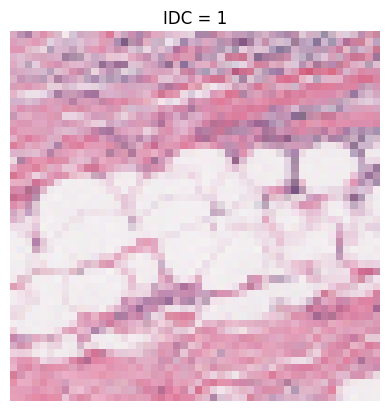

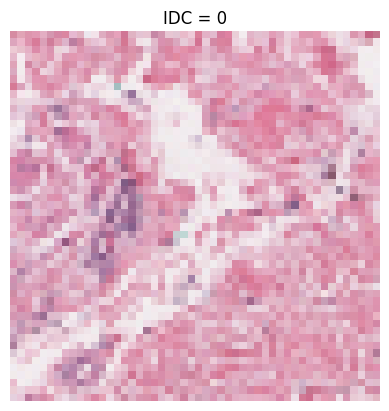

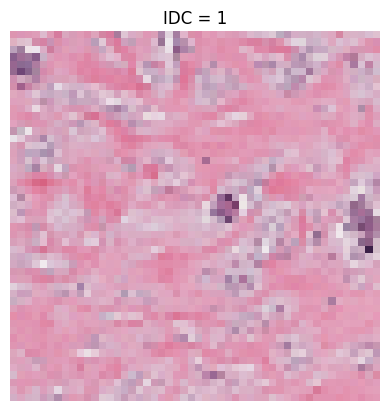

In [134]:
#displaying the first five images in the training set along with the labels
for i in range(5):
    plt.imshow(x_train[i], cmap='gray'), plt.axis("off")
    plt.title('IDC = %d'%y_train[i])
    plt.show()

In [135]:
#printing the data to show that it's now 0-1
print(x_train[:3])

[[[[0.859375   0.53125    0.64453125]
   [0.84765625 0.54296875 0.640625  ]
   [0.890625   0.53125    0.640625  ]
   ...
   [0.87890625 0.59375    0.6953125 ]
   [0.92578125 0.8203125  0.859375  ]
   [0.9296875  0.89453125 0.91796875]]

  [[0.8359375  0.48828125 0.58984375]
   [0.8984375  0.578125   0.6796875 ]
   [0.87109375 0.4765625  0.58203125]
   ...
   [0.9140625  0.796875   0.83203125]
   [0.90234375 0.79296875 0.84765625]
   [0.94921875 0.89453125 0.90625   ]]

  [[0.85546875 0.5        0.59375   ]
   [0.85546875 0.55859375 0.66015625]
   [0.8671875  0.484375   0.58984375]
   ...
   [0.9453125  0.91015625 0.9140625 ]
   [0.93359375 0.85546875 0.88671875]
   [0.91796875 0.84375    0.8828125 ]]

  ...

  [[0.73046875 0.37890625 0.5       ]
   [0.83984375 0.5390625  0.64453125]
   [0.8671875  0.5703125  0.6796875 ]
   ...
   [0.875      0.484375   0.59765625]
   [0.87890625 0.51953125 0.625     ]
   [0.85546875 0.4921875  0.59375   ]]

  [[0.796875   0.48046875 0.58203125]
   [0.8

In [136]:
# reshape data

x_train_r = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_r = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

print("x_train shape: ",x_train_r.shape)
print("x_test shape: ",x_test_r.shape)

x_train shape:  (4437, 7500)
x_test shape:  (1110, 7500)


In [140]:
def buildclassifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train_r.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [141]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 200)
accuracies = cross_val_score(estimator = classifier, X = x_train_r, y = y_train, cv = 6)
mean = accuracies.mean()
variance = accuracies.std()

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 2/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 3/200
116/116 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 5/200
116/116 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 6/200
116/116 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 7/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 8/200
116/116 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 10/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accura

116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 82/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 83/200
116/116 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 84/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 85/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 86/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 87/200
116/116 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 88/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 89/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 90/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 

116/116 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 161/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 162/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 163/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 164/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 165/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 166/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 167/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 168/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 169/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 1s 3ms/step - loss: 0.6909 - accuracy: 0.4991
Epoch 2/200
116/116 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5256
Epoch 3/200
116/116 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.5794
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6670
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6789
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.6814
Epoch 7/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.6971
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7092
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7060
Epoch 10/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5770 - accura

116/116 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.8004
Epoch 82/200
116/116 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.8012
Epoch 83/200
116/116 [==============================] - 0s 4ms/step - loss: 0.4634 - accuracy: 0.7893
Epoch 84/200
116/116 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7974
Epoch 85/200
116/116 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7969
Epoch 86/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7966
Epoch 87/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7971
Epoch 88/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7863
Epoch 89/200
116/116 [==============================] - 1s 5ms/step - loss: 0.4619 - accuracy: 0.8006
Epoch 90/200
116/116 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 

116/116 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8372
Epoch 161/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8339
Epoch 162/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8380
Epoch 163/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8304
Epoch 164/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8480
Epoch 165/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8385
Epoch 166/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8336
Epoch 167/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8342
Epoch 168/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8485
Epoch 169/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3971 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5177
Epoch 2/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5418
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6297
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.6589
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.6892
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.6868
Epoch 7/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7136
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7100
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7225
Epoch 10/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5496 - accura

116/116 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7896
Epoch 82/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8098
Epoch 83/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7925
Epoch 84/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.7841
Epoch 85/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7928
Epoch 86/200
116/116 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8004
Epoch 87/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7906
Epoch 88/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7950
Epoch 89/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8017
Epoch 90/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 

116/116 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8556
Epoch 161/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8504
Epoch 162/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8545
Epoch 163/200
116/116 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8564
Epoch 164/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8658
Epoch 165/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8499
Epoch 166/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8626
Epoch 167/200
116/116 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8534
Epoch 168/200
116/116 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8602
Epoch 169/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3062 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.4932
Epoch 2/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5408
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.6025
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6701
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6777
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.6942
Epoch 7/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7052
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7093
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7158
Epoch 10/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5479 - accura

116/116 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7872
Epoch 82/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7861
Epoch 83/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7885
Epoch 84/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7831
Epoch 85/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7958
Epoch 86/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7891
Epoch 87/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7818
Epoch 88/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7839
Epoch 89/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7869
Epoch 90/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 

116/116 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8315
Epoch 161/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8202
Epoch 162/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8272
Epoch 163/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8275
Epoch 164/200
116/116 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8091
Epoch 165/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8334
Epoch 166/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8369
Epoch 167/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8121
Epoch 168/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8050
Epoch 169/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4088 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.4916
Epoch 2/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5665
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6514
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6766
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.6898
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.7044
Epoch 7/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7085
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.7023
Epoch 9/200
116/116 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.7101
Epoch 10/200
116/116 [==============================] - 0s 3ms/step - loss: 0.5733 - accura

116/116 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7945
Epoch 82/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7991
Epoch 83/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8045
Epoch 84/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7850
Epoch 85/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.8015
Epoch 86/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8048
Epoch 87/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7853
Epoch 88/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8075
Epoch 89/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8021
Epoch 90/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 

116/116 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7864
Epoch 161/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8532
Epoch 162/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8440
Epoch 163/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8610
Epoch 164/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8551
Epoch 165/200
116/116 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8499
Epoch 166/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8145
Epoch 167/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7734
Epoch 168/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7939
Epoch 169/200
116/116 [==============================] - 0s 2ms/step - loss: 0.4465 - a

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
116/116 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5206
Epoch 2/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5433
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6155
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.5952
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5068
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5068
Epoch 7/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5068
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5068
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5068
Epoch 10/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6932 - accura

116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 82/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 83/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 84/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 85/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 86/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 87/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 88/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 89/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 90/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 

116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 161/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 162/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 163/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 164/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 165/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 166/200
116/116 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 167/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 168/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 169/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6931 - a

In [142]:
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Accuracy mean: 0.6563060015360422
Accuracy variance: 0.10655165146164908


In [146]:
#classifiying decision tree and fitting it
dtc = DecisionTreeClassifier()
dtc.fit(x_train_r,y_train)

DecisionTreeClassifier()

In [147]:
#running the accuracy of the decision tree
dscore = dtc.score(x_test_r,y_test)
print("Decision Tree Score: ", dscore)

Decision Tree Score:  0.681981981981982


In [149]:
#classifying random forest tree and fitting it
rfc= RandomForestClassifier(n_estimators = 100, random_state=42) #n_estimator = DT
rfc.fit(x_train_r,y_train) 

RandomForestClassifier(random_state=42)

In [150]:
#accuracy of random forest
rscore=rfc.score(x_test_r,y_test)
print("Random Forest Score: ", rscore)

Random Forest Score:  0.7855855855855856


In [151]:
#SVC classiying and fitting
svc = SVC(random_state=42)
svc.fit(x_train_r,y_train)

SVC(random_state=42)

In [152]:
#accuracy of SVC
sscore = svc.score(x_test_r,y_test)
print ("SVM Accuracy:", sscore)

SVM Accuracy: 0.7882882882882883


In [153]:
#logistic regression classifying and fittnig
lr = LogisticRegression()
lr.fit(x_train_r,y_train)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [154]:
#logisitic regression accuracy
lscore = lr.score(x_test_r,y_test)
print("logistic Regression accuracy", lscore)

logistic Regression accuracy 0.6711711711711712


In [155]:
#logistic regression classifying and fittnig
knn = KNeighborsClassifier()
knn.fit(x_train_r,y_train)

KNeighborsClassifier()

In [156]:
#logisitic regression accuracy
kscore = knn.score(x_test_r,y_test)
print("KNeighbors accuracy", kscore)

KNeighbors accuracy 0.727027027027027


In [63]:
results = []
results.append(mean)
results.append(dscore)
results.append(rscore)
results.append(sscore)
results.append(lscore)
results.append(kscore)
print(results)

[0.6765765765765765, 0.6792792792792792, 0.7594594594594595, 0.7648648648648648, 0.7027027027027027, 0.7171171171171171]


In [59]:
models = []
models.append(('classifier', KerasClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('svc', SVC()))
models.append(('ls', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
print(models)

[('classifier', KerasClassifier(
	model=None
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)), ('dtc', DecisionTreeClassifier()), ('rfc', RandomForestClassifier()), ('svc', SVC()), ('ls', LogisticRegression()), ('knn', KNeighborsClassifier())]
